<a href="https://colab.research.google.com/github/Mohit03singh/Global-Terrorism-Database-Analysis/blob/main/GLOBAL_TERRIORST_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Global Terrorism Database project**

##### **Project Type**    - EDA/Global Terrorism Database project
##### **Contribution**    - Team
##### **Team Member 1 -MOHIT**
##### **Team Member 2 -TILAK  R**
##### **Team Member 3 - SOHIL SINGHANIA**
##### **Team Member 4 -NAIVAIDYA TRIPATHI**

# **Project Summary -**

<h1> <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</h1>



**Geography**: All across the globe

**Time** **period**: 1970-2017,

**Units** **of** **analysis**: Attack, Years, Region, Cities, Property etc..

**Variables**: >100 variables on location, tactics, perpetrators, targets, and outcomes

<b> Explore and analyze the data to discover key findings pertaining to terrorist activities.

### The main objective of this project is to analyse few key findings such as :

### 1. Lets See Which Year was the most peacefull and which was the most violent year and general trends of attacks through out the year
### 2. Casualties over the year
### 3.COUNTRIES BASED ON SAFETY
### 4.Pie plot to check relationship between successfull and unsuccessful


# **DATA** **WRANGLING** **AND** **CLEANING**

In [1]:
# importing libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

working_dir_path = '/content/Global Terrorism Data.csv'

df = pd.read_csv(working_dir_path ,encoding="ISO-8859-1")

<ipython-input-2-dbbcc8edceda>:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(working_dir_path ,encoding="ISO-8859-1")


In [3]:
dataset = df.copy()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df.head()
# checking first 5 rows to get the general overview of data frame

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#<h1>   <b> Lets first understand and get the idea about all major variables that we used in the our csv file  </h1>


There are 135 variables in Dataset after the first glance of Dataset found that most of the variables has hight number of NaN values. Each observation is belong the a particular attack and below is description of variables by which details of attack is captured.

<u> iYear</u> - year when the attack happen

<u>imonth</u>- month in which the attack happen

<u>iDay</u>- Day of the month in which the attack happen

<u>region</u> - Region where attack happen

<u>country_txt</u> - Name of the country where atttack happen

<u>city</u>- Name of the city of the country

<u>attacktype</u>= Type of Attack(ie. Assassination,Bombing/Explosion.....)

<u>target_type</u>- Type of a target(ie.Private Citizens & Property,Government (Diplomatic)......)

<u>group</u>- Name of the terrorist group who takes attackes responsibility .

<u>weapon_type</u>- Type of the weapon used

<u>killed</u>- Numeber of people killed in attack

<u>wounded</u>- Number of people injured in Attack

In [5]:
#checking how many total coloums and rows present in Data Frame it will show like(tota_rows,total_columns)
df.shape

(181691, 135)

In [13]:
#get the details of attiributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 64 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  location          55495 non-null   object 
 16  summary           11

In [14]:
#get the details of columns(Variables)
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'guncertain1', 'individual', 'nperps',
       'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propcomment', 'ishostkid', 'ransom', 'scite1',
       'scite2', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [15]:
# Checking how many variables has more than 70% NaN values and store the name of columns in the list columns_with_NaN
columns_with_NaN = [i for i in df.columns if df[i].isna().sum()*100/len(df)>70]

In [16]:
columns_with_NaN

[]

In [17]:
 #Now dropping all the columns with more than 70% NaN values from data frame (axis=1 for column)
df.drop(columns_with_NaN,inplace=True,axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 64 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  location          55495 non-null   object 
 16  summary           11

In [19]:
# Now change variable name into meaningful variable for better understanding
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region',
                       'attacktype1_txt':'AttackType','targtype1_txt':'Target','nkill':'fatalities','nwound':'injuries',
                       'summary':'Summary','gname':'Group','weaptype1_txt':'Weapon'},inplace=True)

In [20]:
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'extended', 'country', 'Country',
       'region', 'Region', 'state', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'location', 'Summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'AttackType', 'targtype1', 'Target', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'Group', 'guncertain1',
       'individual', 'nperps', 'nperpcap', 'claimed', 'weaptype1', 'Weapon',
       'weapsubtype1', 'weapsubtype1_txt', 'weapdetail', 'fatalities',
       'nkillus', 'nkillter', 'injuries', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propextent_txt', 'propcomment', 'ishostkid', 'ransom',
       'scite1', 'scite2', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

In [21]:
df['Casualities'] = df['fatalities']+ df['injuries']

In [22]:
df_most_selected = df[['Year','Month','Day','Country','state','Region','AttackType','Target','fatalities','injuries','success','Summary','Group','Weapon','Casualities','city','longitude','latitude']]


In [23]:
df_most_selected.info()
# Selcting the variables on which analysis will be performed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   AttackType   181691 non-null  object 
 7   Target       181691 non-null  object 
 8   fatalities   171378 non-null  float64
 9   injuries     165380 non-null  float64
 10  success      181691 non-null  int64  
 11  Summary      115562 non-null  object 
 12  Group        181691 non-null  object 
 13  Weapon       181691 non-null  object 
 14  Casualities  164817 non-null  float64
 15  city         181257 non-null  object 
 16  longitude    177134 non-null  float64
 17  latitude     177135 non-null  float64
dtypes: float64(5), int64(4),

In [24]:
# checking statits paramenter on continious variables of data frame
df_most_selected.describe()

,Year,Month,Day,fatalities,injuries,success,Casualities,longitude,latitude
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000,181691.000000,164817.000000,1.771340e+05,177135.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668,0.889598,5.296128,-4.586957e+02,23.498343
std,13.259430,3.388303,8.814045,11.545741,35.949392,0.313391,42.069023,2.047790e+05,18.569242
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.618590e+07,-53.154613
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,1.000000,0.000000,4.545640e+00,11.510046
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000,1.000000,4.324651e+01,31.467463
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,1.000000,4.000000,6.871033e+01,34.685087
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,1.000000,9574.000000,1.793667e+02,74.633553


inference- as we can infer from above table most number of fatalities were 1570 and most number of injuries were 8191 throuout the data for a single incident and max in the year of 2017.

In [25]:
#creating custom  function of redundent task thet we will be doing throughout the Analysis

# custom funtion to create count plot
def makeCountPlot(df,col,x_label=None,y_label=None,title=None,palette=None,hue=None):
  if df[col].value_counts().shape[0]<10:
    plt.figure(figsize=(12,6),dpi=100)
    sns.countplot(data=df,x=col,palette=palette,hue=hue,order=df[col].value_counts().index)
    plt.xlabel(x_label,fontweight='bold')
    plt.ylabel(y_label,fontweight='bold')
    plt.title(title, fontweight='bold',fontsize=17);
  else:
    plt.figure(figsize=(25,7),dpi=500)
    sns.countplot(data=df,x=col,palette=palette,hue=hue,order=df[col].value_counts().index)
    plt.xlabel(x_label,fontweight='bold')
    plt.ylabel(y_label,fontweight='bold')
    plt.title(title, fontweight='bold',fontsize=17);

# Custom funtion to create Bar plot
def makeBarPlot(df,col1,col2,x_label=None,y_label=None,title=None,palette=None,hue=None):
  if df[col1].value_counts().shape[0]<10:
    plt.figure(figsize=(12,6),dpi=100)
    sns.barplot(data=df,x=col1,y=col2,palette=palette,hue=hue,order=df[col1].value_counts().index)
    plt.xlabel(x_label,fontweight='bold')
    plt.ylabel(y_label,fontweight='bold')
    plt.title(title, fontweight='bold',fontsize=17);
  else:
    plt.figure(figsize=(25,7),dpi=500)
    sns.barplot(data=df,x=col1,y=col2,palette=palette,hue=hue,order=df[col1].value_counts().index)
    plt.xlabel(x_label,fontweight='bold')
    plt.ylabel(y_label,fontweight='bold')
    plt.title(title, fontweight='bold',fontsize=17);

#Custom funtion to create Scatter plot
def makeScatterPlot(df,col1,col2,hue=None):
  sns.scatterplot(data=df,x=col1,y=col2,hue=hue,palette='Dark2',s=100,style=hue)
  plt.figure(figsize=(12,4),dpi=100)

<h1>1. Lets See Which Year was the most peacefull and which was the most violent year and general trends of attacks through out the year</h1>

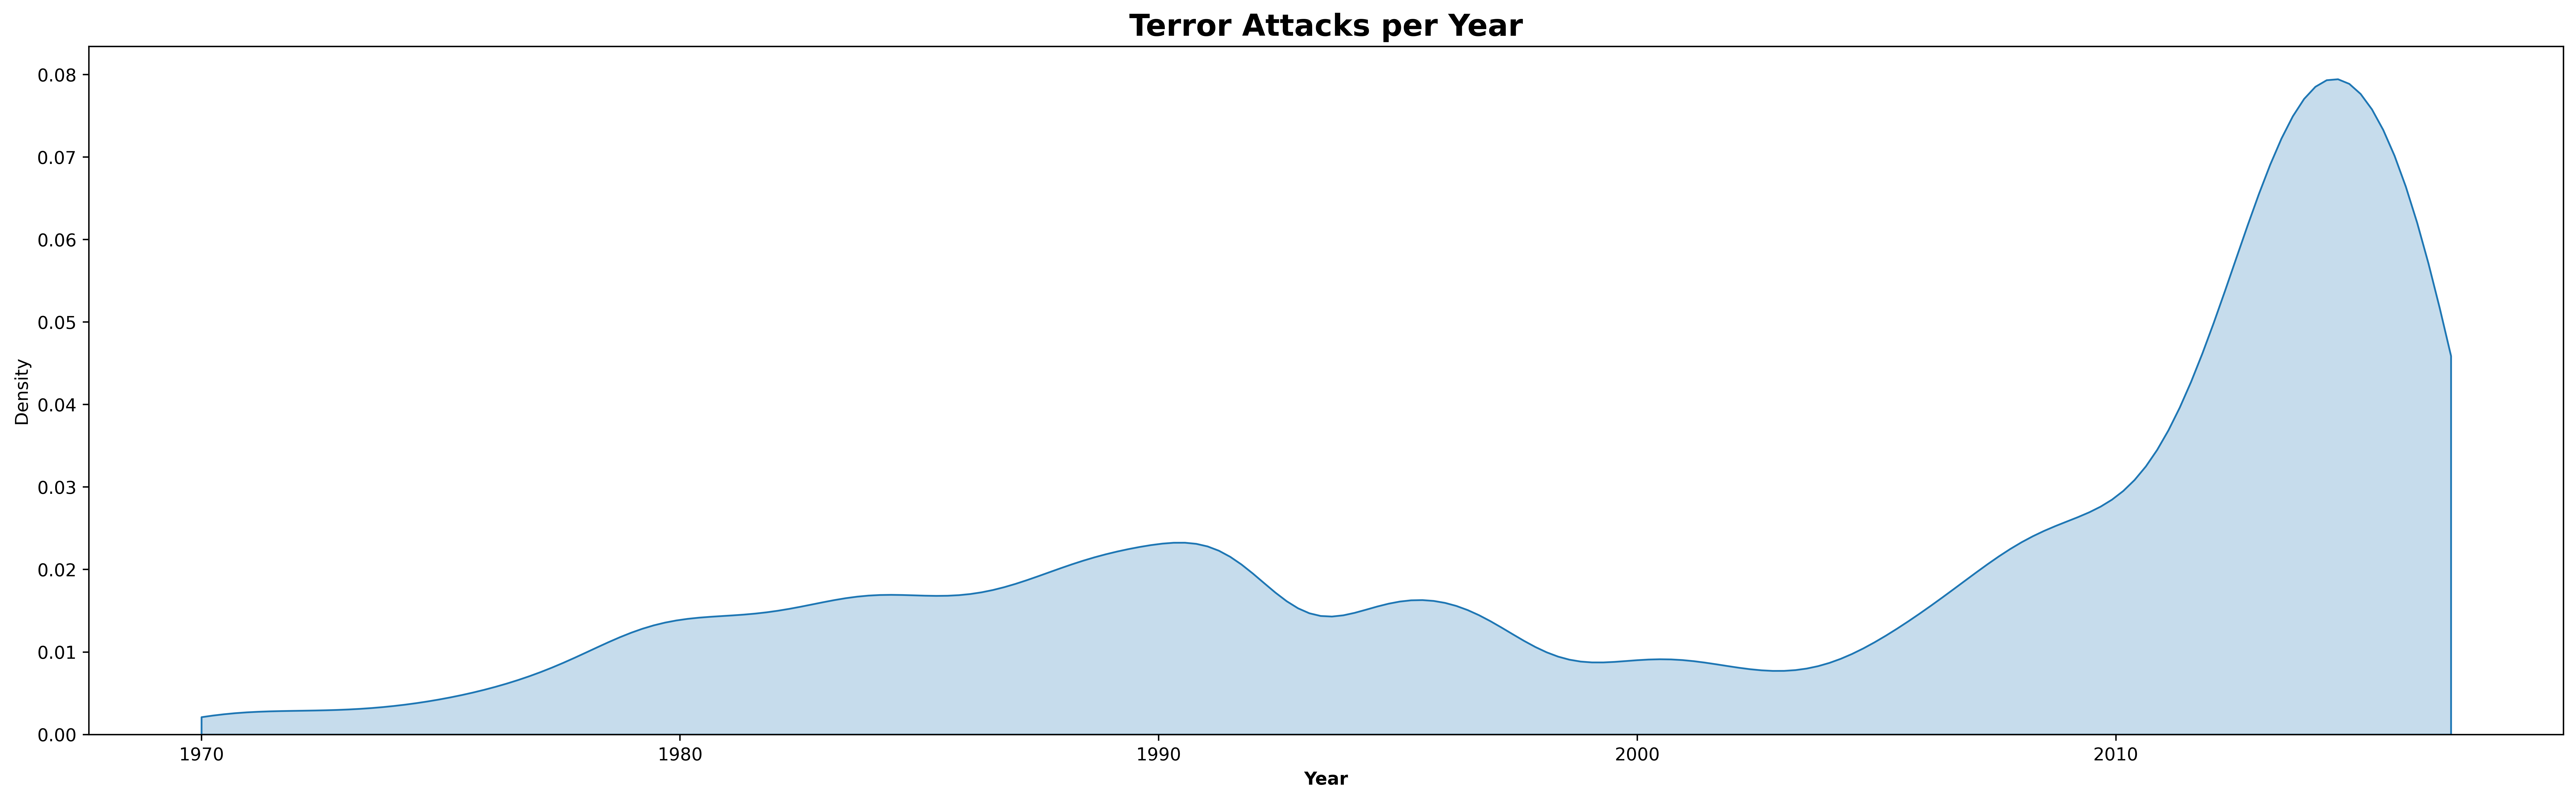

In [26]:
#creating kde plot to get the flow of the data based on year--to get the idea when it was going down and when it was going up
plt.figure(figsize=(25,7),dpi=500)
sns.kdeplot(data=df_most_selected,x='Year',clip=[1970,2017],fill=True)
plt.xlabel('Year',fontweight='bold')
plt.title('Terror Attacks per Year', fontweight='bold',fontsize=17);

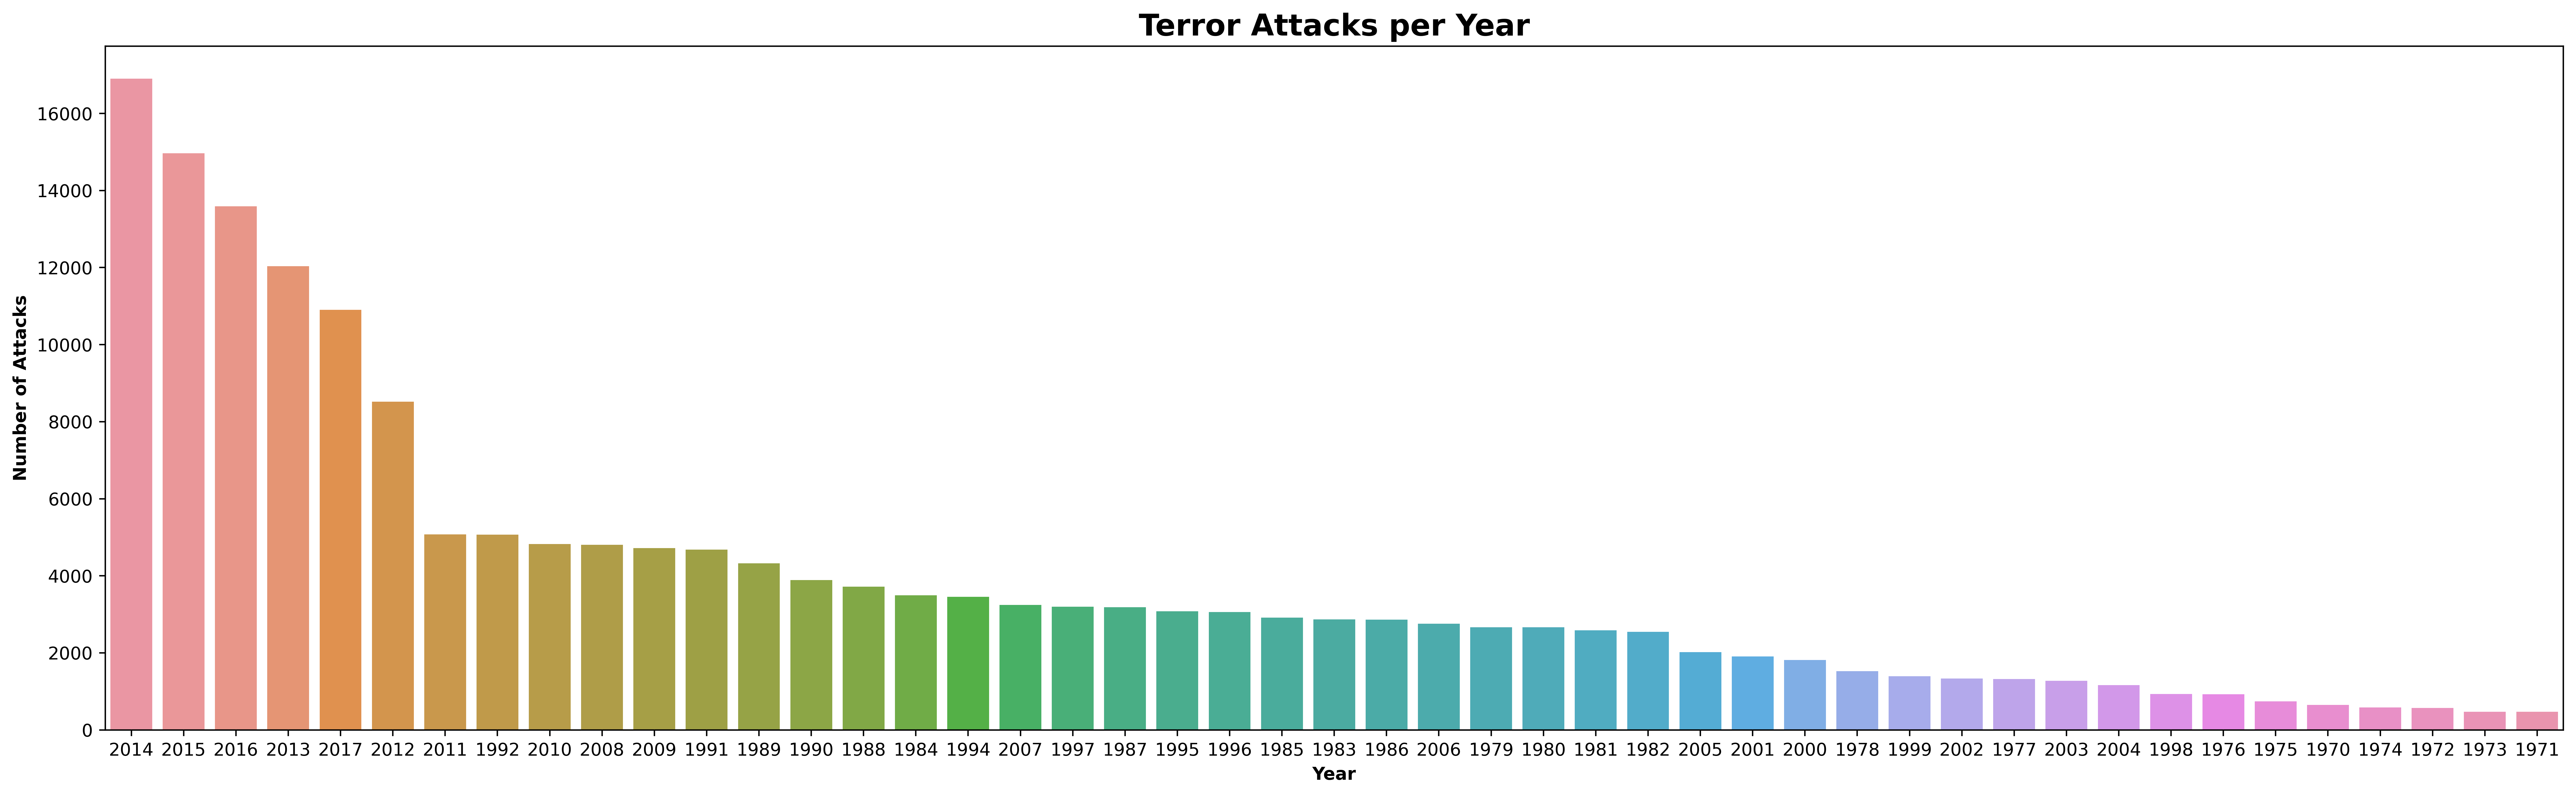

In [27]:
# creating the Count plot based on years ---using custom function
makeCountPlot(df_most_selected,'Year',x_label='Year',y_label='Number of Attacks',title='Terror Attacks per Year',palette=None)


Inference-- As we can see in the above two graphs terrorist activities were moderately increasing from 1971 till 1992 and after that there was a slight declince in the attacks for some time and after the year 2003-04 terrorist activities increased sharply. year 2014 is most violent and year 1971 was least violent as per the data.

# **2 . Casualties over the year**

In [28]:
Casualties = df_most_selected[["Year","Casualities"]].groupby('Year').sum()

In [29]:
Casualties

,Casualities
Year,
1970,367.0
1971,119.0
1972,602.0
1973,621.0
1974,1122.0
1975,781.0
1976,1158.0
1977,874.0
1978,2664.0


In [30]:
Casualties.sum()

Casualities    872892.0
dtype: float64

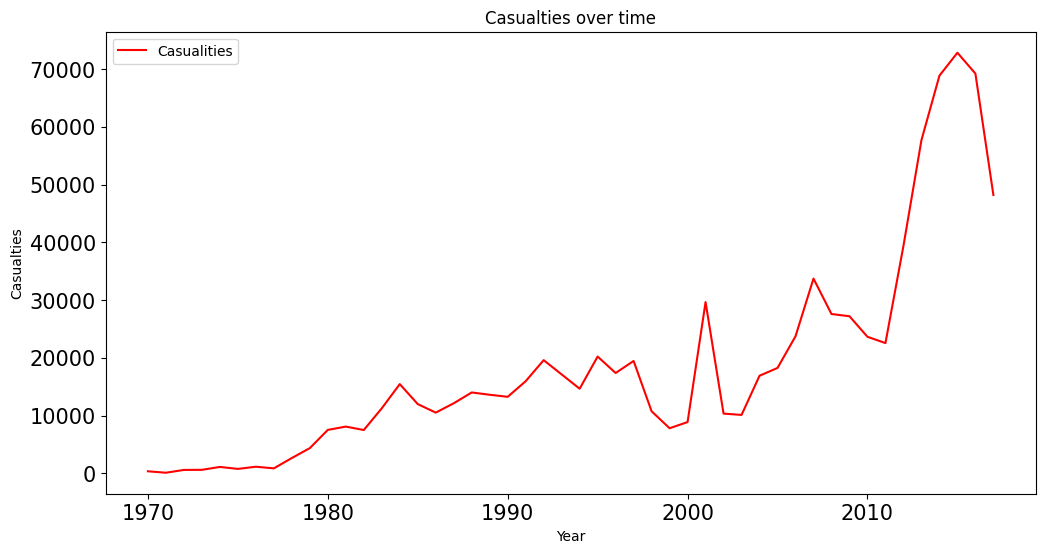

In [31]:
# now lets plot casualties over the plot
Casualties.plot(kind = "line",color = "red", figsize = (12,6), fontsize = 15)
plt.title("Casualties over time")
plt.xlabel("Year")
plt.ylabel("Casualties")
plt.show()

**INFERENCE** : "We can see from the figure that the trend is **increasing sharply from 2000's and reached its peak at 2016 and it was** low at 1970's" and the number of people **killed** and **wounded** is **872892.0** .

## **3.COUNTRIES BASED ON SAFETY**

In [32]:
df_most_selected['safety']=df_most_selected.apply((lambda x: 'Least_vulnearble' if x['Casualities']<=10 else 'Moderately_vulnearble' if x['Casualities']>=10 else 'Highly_vulnearble' if  x['Casualities']>=100   else 'Undefined' ),axis=1)
df_most_selected.head(100)

<ipython-input-32-b5ef6a7a0dc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most_selected['safety']=df_most_selected.apply((lambda x: 'Least_vulnearble' if x['Casualities']<=10 else 'Moderately_vulnearble' if x['Casualities']>=10 else 'Highly_vulnearble' if  x['Casualities']>=100   else 'Undefined' ),axis=1)


,Year,Month,Day,Country,state,Region,AttackType,Target,fatalities,injuries,success,Summary,Group,Weapon,Casualities,city,longitude,latitude,safety
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Private Citizens & Property,1.0,0.0,1,NaN,MANO-D,Unknown,1.0,Santo Domingo,-69.951164,18.456792,Least_vulnearble
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,1,NaN,23rd of September Communist League,Unknown,0.0,Mexico city,-99.086624,19.371887,Least_vulnearble
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Journalists & Media,1.0,0.0,1,NaN,Unknown,Unknown,1.0,Unknown,120.599741,15.478598,Least_vulnearble
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,Government (Diplomatic),NaN,NaN,1,NaN,Unknown,Explosives,NaN,Athens,23.762728,37.997490,Undefined
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,1,NaN,Unknown,Incendiary,NaN,Fukouka,130.396361,33.580412,Undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1970,2,28,Jordan,Khalil,Middle East & North Africa,Armed Assault,Tourists,NaN,NaN,1,NaN,Unknown,Firearms,NaN,Hebron,35.094162,31.530243,Undefined
96,1970,3,0,Philippines,Metropolitian Manila,Southeast Asia,Bombing/Explosion,Government (Diplomatic),0.0,0.0,1,NaN,Unknown,Explosives,0.0,Manila,120.978666,14.596051,Least_vulnearble
97,1970,3,1,Italy,Lazio,Western Europe,Bombing/Explosion,Airports & Aircraft,0.0,0.0,0,NaN,Eritrean Liberation Front,Explosives,0.0,Rome,12.490069,41.890961,Least_vulnearble
98,1970,3,1,United States,Colorado,North America,Bombing/Explosion,Military,0.0,0.0,1,3/1/1970: Unknown perpetrators bombed the offi...,Student Radicals,Explosives,0.0,Boulder,-105.265942,40.007581,Least_vulnearble


In [33]:
new_safety = df_most_selected.head(10000)

In [34]:
df_most_selected

,Year,Month,Day,Country,state,Region,AttackType,Target,fatalities,injuries,success,Summary,Group,Weapon,Casualities,city,longitude,latitude,safety
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Private Citizens & Property,1.0,0.0,1,NaN,MANO-D,Unknown,1.0,Santo Domingo,-69.951164,18.456792,Least_vulnearble
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,1,NaN,23rd of September Communist League,Unknown,0.0,Mexico city,-99.086624,19.371887,Least_vulnearble
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Journalists & Media,1.0,0.0,1,NaN,Unknown,Unknown,1.0,Unknown,120.599741,15.478598,Least_vulnearble
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,Government (Diplomatic),NaN,NaN,1,NaN,Unknown,Explosives,NaN,Athens,23.762728,37.997490,Undefined
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,1,NaN,Unknown,Incendiary,NaN,Fukouka,130.396361,33.580412,Undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Armed Assault,Military,1.0,2.0,1,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Firearms,3.0,Ceelka Geelow,45.385034,2.359673,Least_vulnearble
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Bombing/Explosion,Military,2.0,7.0,1,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Explosives,9.0,Jableh,35.942679,35.407278,Least_vulnearble
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Facility/Infrastructure Attack,Private Citizens & Property,0.0,0.0,1,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,Kubentog,124.437908,6.900742,Least_vulnearble
181689,2017,12,31,India,Manipur,South Asia,Bombing/Explosion,Government (General),0.0,0.0,0,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Explosives,0.0,Imphal,93.940430,24.798346,Least_vulnearble


Inferemce : we can observe from the graph that the **american, middle east and africana continents** are **highly succeptible** to terrorist attacks followed **by south asian countries**

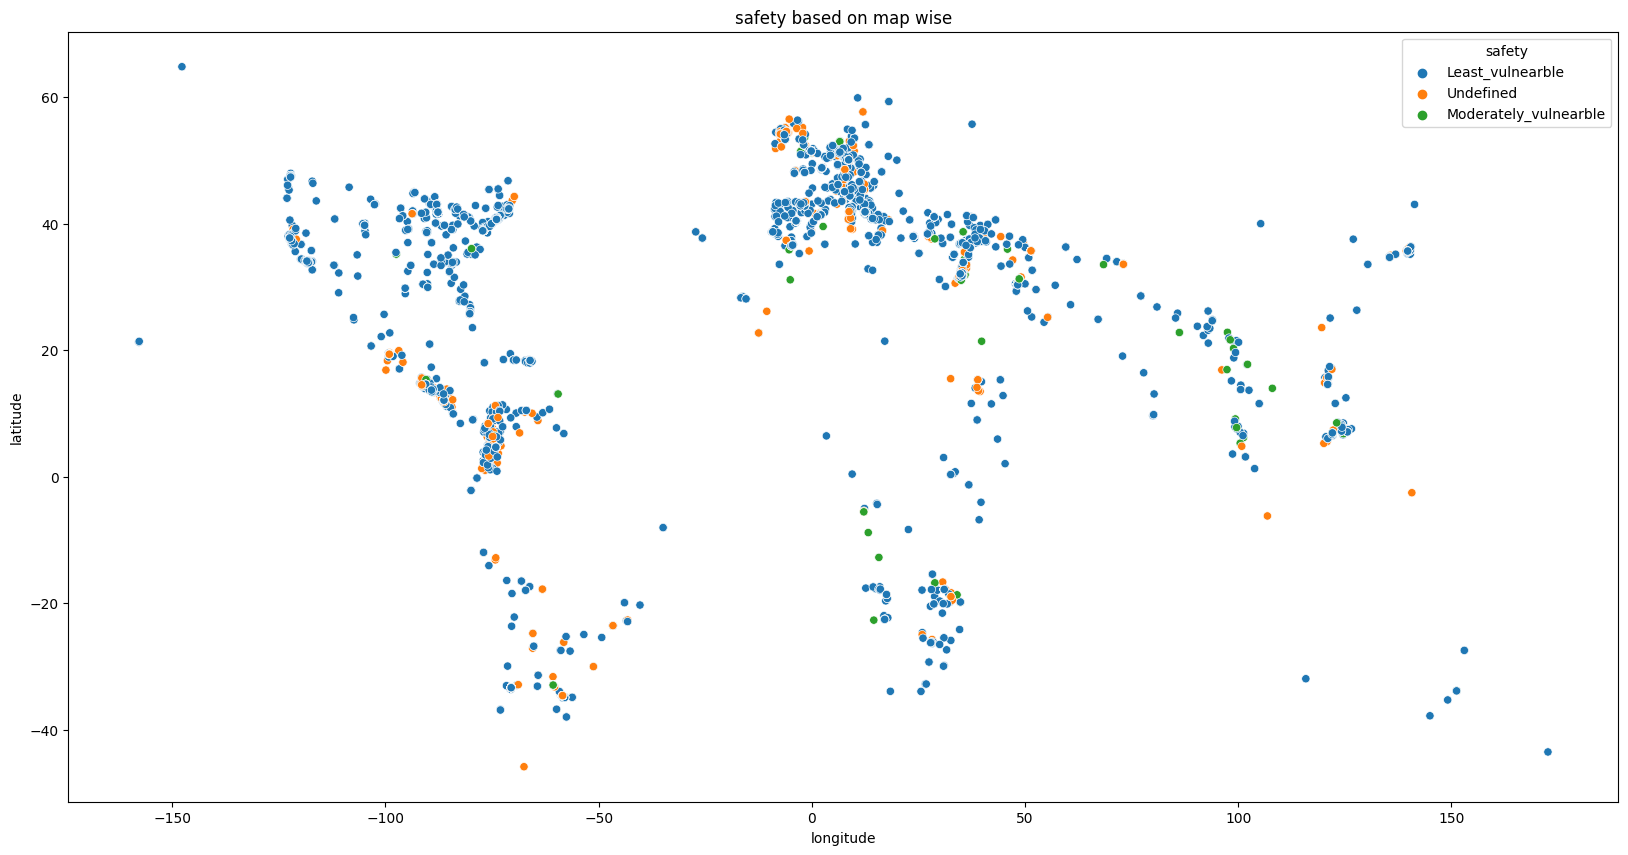

In [35]:
plt.figure(figsize=(20,10))
ax_5 = sns.scatterplot( x = new_safety['longitude'],y =new_safety['latitude'],hue=new_safety['safety'])
ax_5.set_title('safety based on map wise')
ax_5.set_ylabel('latitude')
ax_5.set_xlabel('longitude')
plt.show()


## **4.Pie plot to check relationship between successfull and unsuccessful**

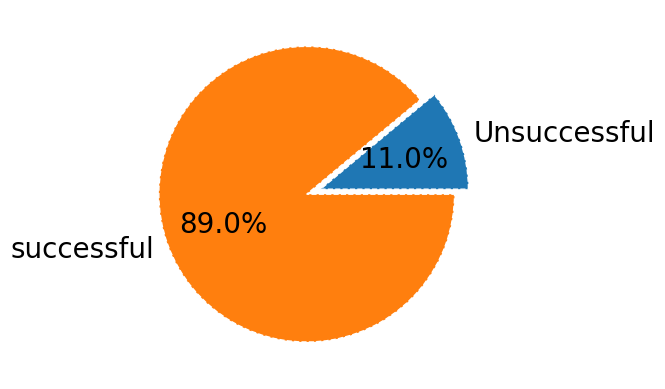

In [36]:
#Creating a Pie plot to check relationship between successfull and unsuccessful
win = df_most_selected.groupby(['success'])['success'].count()
win_list = win.values.tolist()
keys = ['Unsuccessful', 'successful']
palette_color = sns.color_palette('dark')
explode = [0.1, 0]
plt.pie(win_list, labels=keys,explode=explode, autopct='%1.1f%%',wedgeprops={"edgecolor":"1",'linewidth': 1,'linestyle': 'dashed', 'antialiased': True},textprops={'fontsize':20});

Inference- 89% of total attempts are successfull and 11% unsuccessful.

### **5.CREATING NEW DATA FRAME OF 10 MOST AFFECTED COUNTIRES IN TERM OF ATTACKS**

In [37]:
# creating new Data Frame of 10 most affected countries in term of Attacks

most_attacked_countries = df_most_selected['Country'].value_counts()
ten_most_affected_countries = most_attacked_countries.sort_values(ascending=False).head(10)

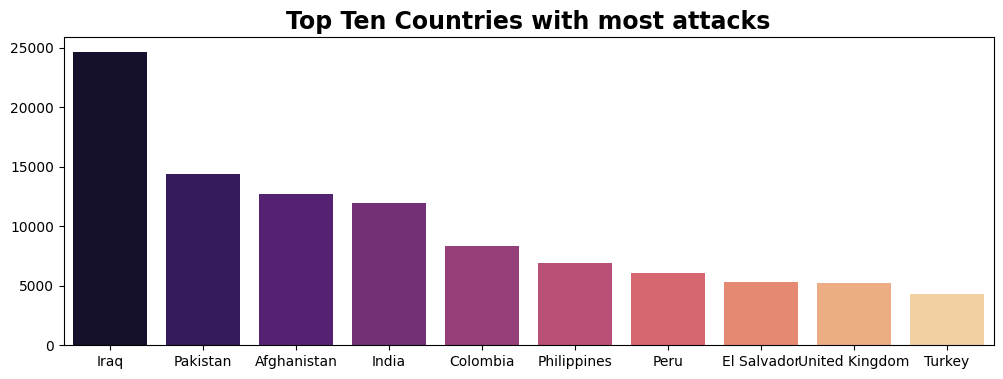

In [38]:
plt.figure(figsize=(12,4),dpi=100)
sns.barplot(x=ten_most_affected_countries.index,y=ten_most_affected_countries.values,palette='magma')
plt.title('Top Ten Countries with most attacks', fontweight='bold',fontsize=17);

Inference- <u> <b> Iraq </u> is most attacked country was terrorist followed by<u> <b>  Pakistan </u> and <b> Afghanistan <u> <b> Afghanistan </u> and in<u> <b> india </u> india is nearly around  13k attack .

## **6. REGIONWISE ATTACKS**

In [39]:
REGION = pd.crosstab(df.Year,df.Region)

In [40]:
REGION.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


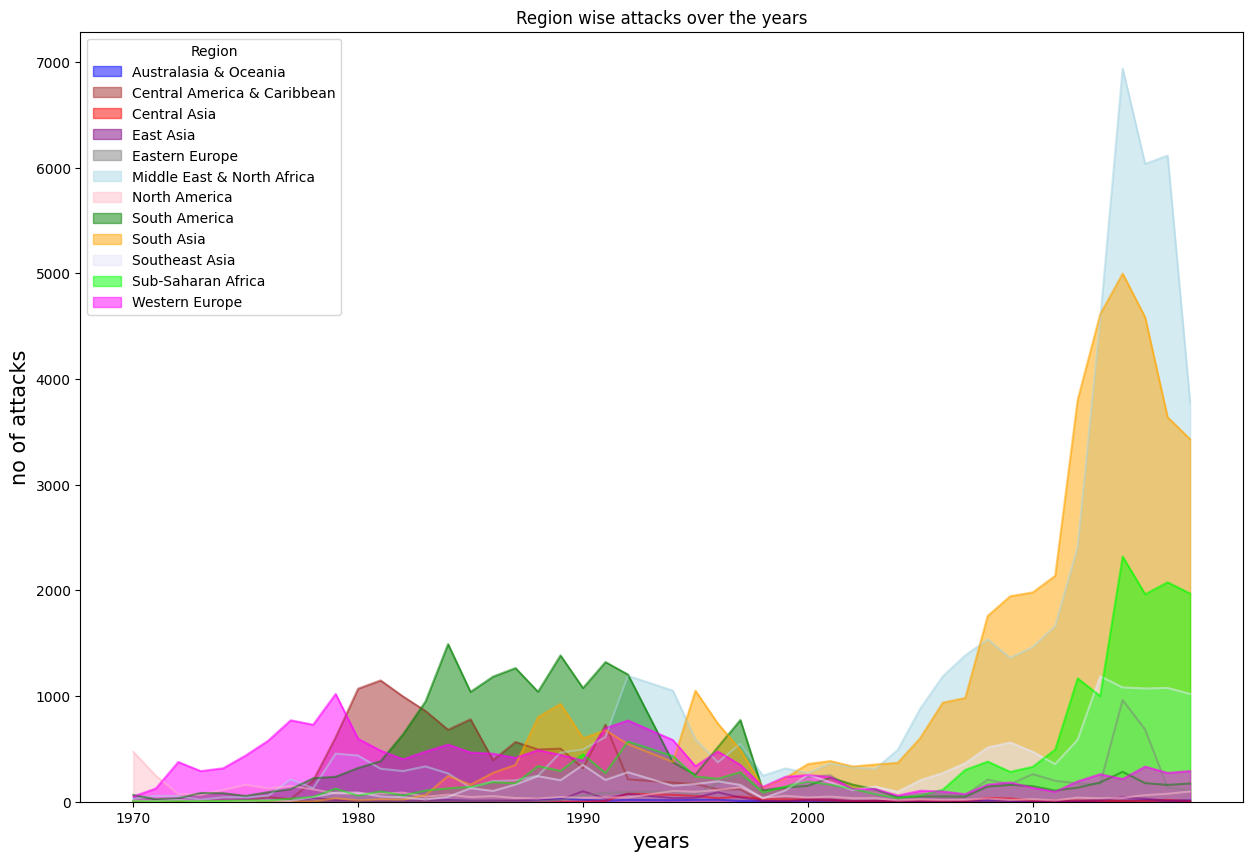

In [41]:
color_set = ["blue","brown","red","purple","gray","lightblue","pink","green","orange","lavender","lime","magenta"]
REGION.plot(kind = "area" ,stacked = False, color = color_set ,alpha = 0.5,  figsize = (15,10) )
plt.title("Region wise attacks over the years")
plt.xlabel("years", fontsize = 15)
plt.ylabel("no of attacks", fontsize = 15)
plt.show()

Inference : It is evident from the figure that the **Middle eastern region** and N**orth African regions** are **highly vulnerable to terrorist attacks** **followed by South Asia**

## ***7. TOTAL TERRORIST ATTACKS IN EACH REGION FROM 1971 - 2017***

In [42]:
TOT = REGION.transpose()
TOT["Total"] = TOT.sum(axis=1)
act = TOT["Total"].sort_values(ascending = False)

In [43]:
act

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

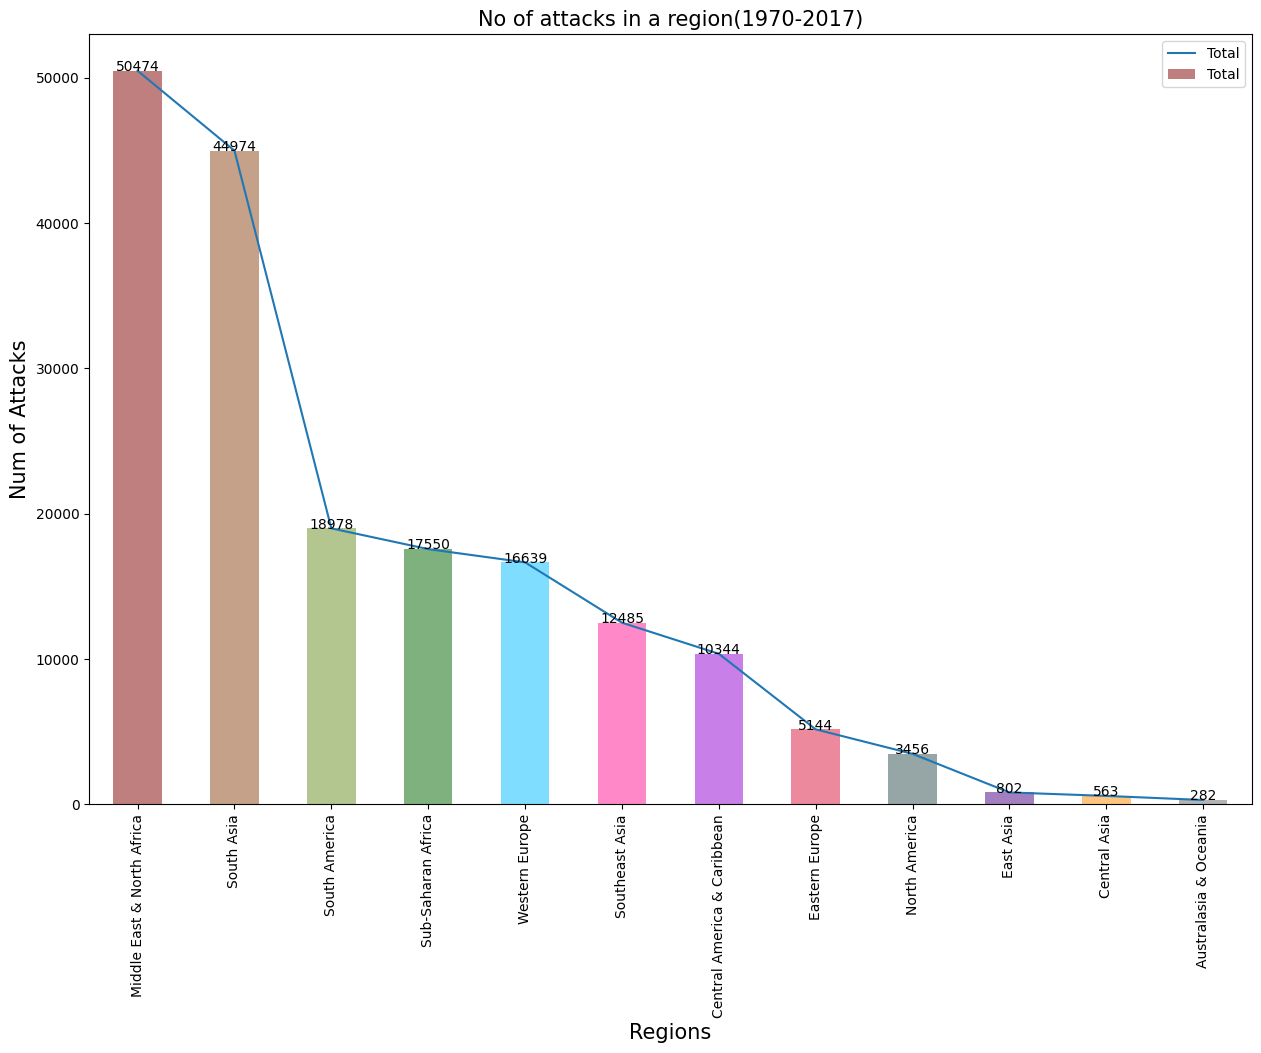

In [44]:
color_set = ["maroon","saddlebrown","olivedrab","darkgreen","deepskyblue","deeppink","darkviolet","crimson","darkslategray","indigo","darkorange","dimgrey"]
act.plot(kind = "bar",color = color_set, stacked = True, alpha = 0.5 , figsize = (15,10) )
act.plot(kind = "line" )
plt.title("No of attacks in a region(1970-2017)", fontsize = 15)
plt.xlabel("Regions", fontsize = 15)
plt.ylabel("Num of Attacks", fontsize = 15)
plt.xticks(rotation = 90)
for i,v in enumerate(act):
  plt.text(i,v, str(v), ha="center")
plt.legend()
plt.show()

In [45]:
Global_Terrorism_data = df.copy()

In [46]:
Global_Terrorism_data

,eventid,Year,Month,Day,extended,country,Country,region,Region,state,...,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Casualities
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,1.0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,1.0,1.0,NaN,NaN,PGIS,0,1,1,1,0.0
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,1.0
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.0,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...",START Primary Collection,0,0,0,0,3.0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.0,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...",START Primary Collection,-9,-9,1,1,9.0
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,START Primary Collection,0,0,0,0,0.0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.0,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,START Primary Collection,-9,-9,0,-9,0.0


Inference : Number of attacks are **more in Middle east and north africa followed by south asia** and **least in Australiasia and Oceania.**

## **8.REMOVAL OF STOP WORDS**

In [47]:
# creating DF for India
df_india = df_most_selected[df_most_selected['Country'] == 'India']

In [48]:
from wordcloud import WordCloud

In [49]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
def stop_word_removal(data):
  stop = set(stopwords)
  data.name	= data.city.str.replace(",", "").str.lower()

## **9.MOST TARGETED CITIES**

In [52]:
City_wise =  df_most_selected["city"].value_counts()[1:11]

In [53]:
City_wise

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: city, dtype: int64

In [54]:
Frequently_used_words = stop_word_removal(Global_Terrorism_data)
Frequently_used_words = " ".join([str(each) for each in Global_Terrorism_data.city])

<ipython-input-51-73768876b74c>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.name	= data.city.str.replace(",", "").str.lower()


<Figure size 1200x600 with 0 Axes>

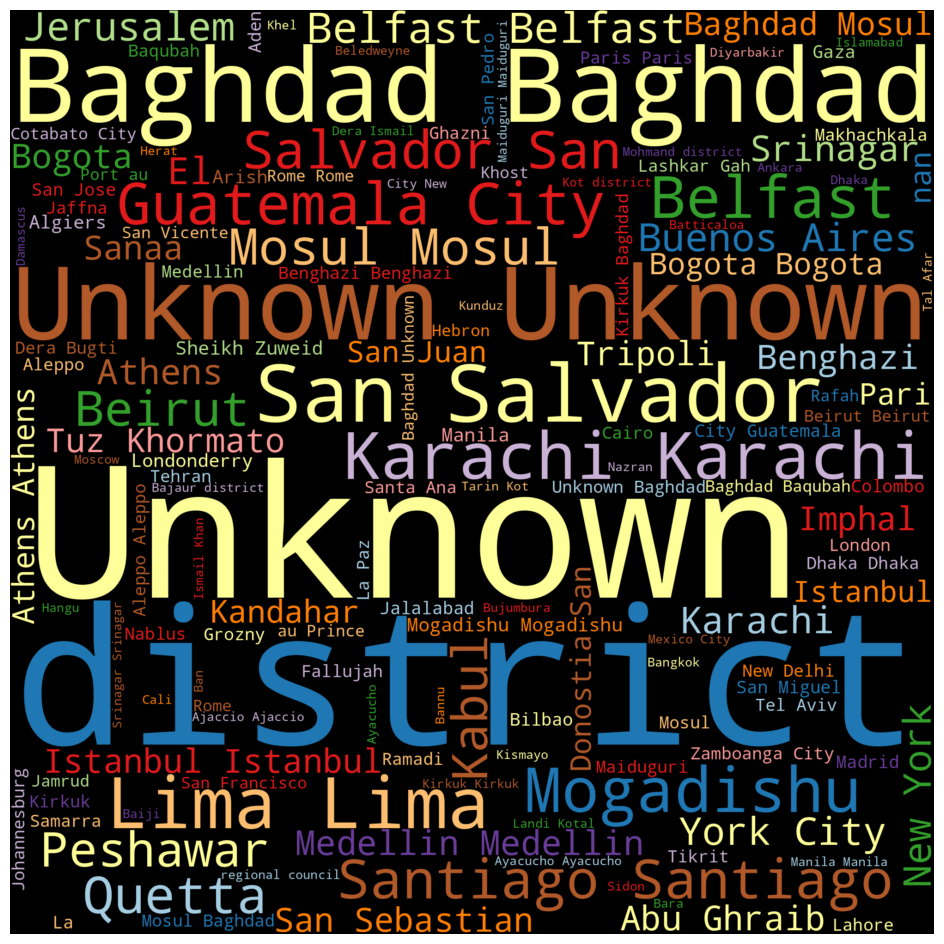

In [55]:
wordcloud = WordCloud(width = 2000, height = 2000, colormap = "Paired_r",max_words = 150, background_color = "black").generate(Frequently_used_words)
plt.figure(figsize=(12,6))
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Inference :  These are some of **the most repeated attacked city names**.

In [56]:
df_most_selected = df[['Year','Month','Day','Country','state','Region','AttackType','Target','fatalities','injuries','success','Summary','Group','Weapon','Casualities','city']]


In [57]:
data  = df_most_selected

## **10. Which weapon type is Taliban's most favorite?**

In [58]:
pip install squarify

In [59]:
import squarify

In [60]:
Group = "Taliban"
def treeplot(data,Group):
  plt.subplots(figsize = (15,10))
  G_t = pd.DataFrame(data[data['Group']==Group]['Weapon'].value_counts())
  G_t.reset_index(level =0 , inplace = True)
  ploty = squarify.plot(sizes = G_t["Weapon"], label = G_t["index"],alpha = 0.8)
  plt.show()
  print("it is evident here that this group uses Explosives more followed by Firearms and other unknown weapons")

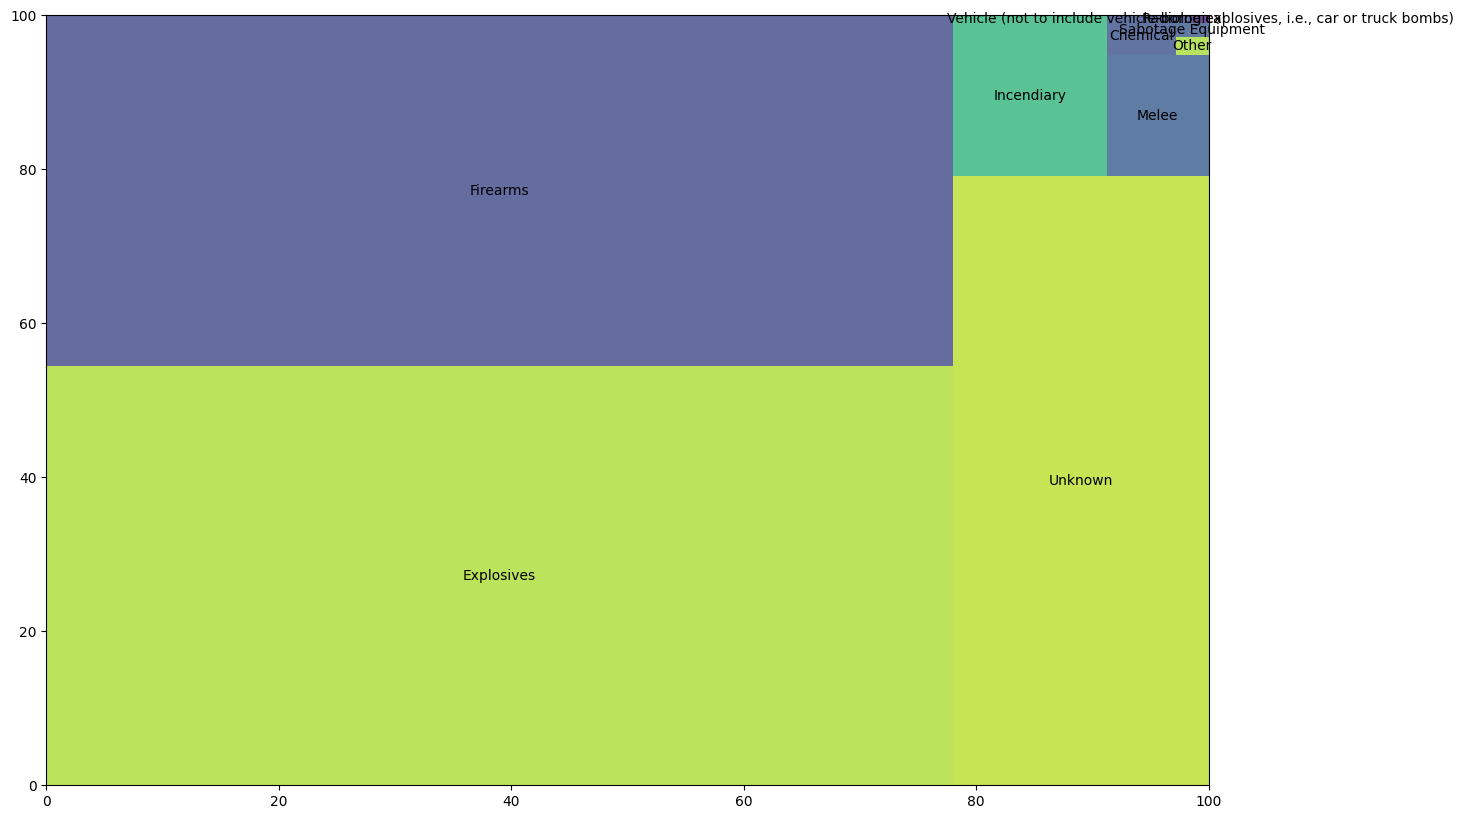

it is evident here that this group uses Explosives more followed by Firearms and other unknown weapons


In [61]:
treeplot(data,"Taliban")